In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [43]:
df = pd.read_csv("Netflix Engagement (plus).csv")

In [44]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
0,The Night Agent: Season 1,Yes,2023-03-23,812100000,7696.0,6.0,"['Biography', 'Drama', 'History']","persian empire,empire,5th century b.c.,achaeme...",NaN
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000,5216.0,5.7,"['Comedy', 'Drama', 'Romance']","producer,three word title,headstrong,arranged ...",The film follows headstrong Ginny who meets Su...
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000,11869.0,8.4,['Short'],NaN,NaN
3,Wednesday: Season 1,Yes,2022-11-23,507700000,NaN,NaN,['Talk-Show'],youtube video,MsMojo counts down the top 10 Wednesday (2022)...
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000,50077.0,7.4,"['Drama', 'History', 'Romance']","prequel,queen,historical,england,queen charlot...","Betrothed against her will to King George, you..."


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18332 entries, 0 to 18331
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18332 non-null  object 
 1   Available Globally?  18332 non-null  object 
 2   Release Date         4879 non-null   object 
 3   Hours Viewed         18332 non-null  int64  
 4   Number of Ratings    14222 non-null  float64
 5   Rating               14222 non-null  float64
 6   Genre                15761 non-null  object 
 7   Key Words            12801 non-null  object 
 8   Description          10619 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.3+ MB


In [46]:
df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Number of Ratings', 'Rating', 'Genre', 'Key Words', 'Description'],
      dtype='object')

In [47]:
df.isnull().sum()

Title                      0
Available Globally?        0
Release Date           13453
Hours Viewed               0
Number of Ratings       4110
Rating                  4110
Genre                   2571
Key Words               5531
Description             7713
dtype: int64

In [48]:
round(((df.isnull().sum()) / df.shape[0])*100, 2)
# percentage of missing values

Title                   0.00
Available Globally?     0.00
Release Date           73.39
Hours Viewed            0.00
Number of Ratings      22.42
Rating                 22.42
Genre                  14.02
Key Words              30.17
Description            42.07
dtype: float64

In [81]:
print(df['Title'].duplicated().sum())

118


In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Viewed,18332.0,5.120205e+06,1.867122e+07,100000.0,200000.00,700000.0,3400000.0,812100000.0
Number of Ratings,14222.0,4.613511e+04,1.486087e+05,5.0,343.25,2594.0,19355.0,2829797.0
Rating,14222.0,6.509056e+00,1.227839e+00,1.2,5.80,6.6,7.3,10.0


Release Date seems to correlate to Neflix Original Shows considering other shows are created by Netflix or imported. 

Key Words act like tags to a show that may have been missed when the data was being scraped and may not hold much use considering its varied types of terms that are not often repeated for other shows in tags.

Description is the same case similar to Key Words, mainly holding only a quick intro to a film. The data may prove difficult to use for analysis regardless due to how unique each entry may be thus having a lack of consistency to be used for analysis.

**Movies Available Globally vs Non-Global**

In [63]:
df['Available Globally?'].value_counts()

No     13798
Yes     4534
Name: Available Globally?, dtype: int64

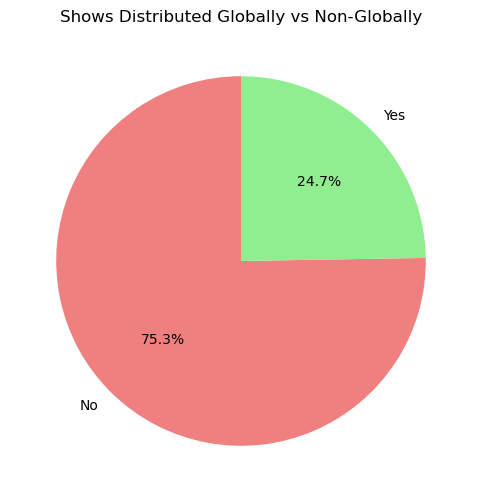

In [64]:
value_count = df['Available Globally?'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(value_count,labels=value_count.index,autopct='%1.1f%%',startangle=90, colors=['lightcoral','lightgreen'])
plt.title('Shows Distributed Globally vs Non-Globally')
plt.show()

Large number of shows are not available globally. But there is a chance that the data may be innacurate considering there were 118 duplicate titles found.

**Understanding what Shows were best rated**

In [50]:
df.loc[df['Number of Ratings'] >= 500].sort_values('Rating',ascending=False).head(10)


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
16573,Mr. Boss // 미스터 보스,No,NaN,100000,530.0,9.4,"['Short', 'Adventure']",NaN,Mr. swag boss&apos;s world gets turned upside ...
425,Avatar: The Last Airbender: Book 3,No,NaN,40100000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
343,Avatar: The Last Airbender: Book 1,No,NaN,45500000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
444,Avatar: The Last Airbender: Book 2,No,NaN,38700000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
5871,The Shawshank Redemption,No,NaN,2100000,2829797.0,9.3,['Drama'],"prison,based on the works of stephen king,esca...",NaN
7870,AHIRU NO SORA: Season 1 // あひるの空: シーズン1,No,NaN,1000000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
7917,Dealer: Season 1 // Caïd: Saison 1,Yes,2021-03-10,1000000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
5849,Still Game: Season 1,No,NaN,2100000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
6611,Nadiya’s Time to Eat: Season 1,Yes,2020-04-29,1600000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
16122,Kissing Game: Season 1 // Boca a Boca: Tempora...,Yes,2020-07-17,100000,14592.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."


Note:

Ratings must be accounted for the total number rather than Ratings by itself.

Some Shows are not globally available and should be accounted for when looking into other trends.

Seems that most words and descriptions were either missing, not available, or was not recorded entirely.

Unavailable Release Dates make no sense unless its mainly looking for the release date of a Netflix Original Series. Most likely scenario is that any "Classed" Netflix Original Series has its release date recorded but imported shows such as Shawshank would not.

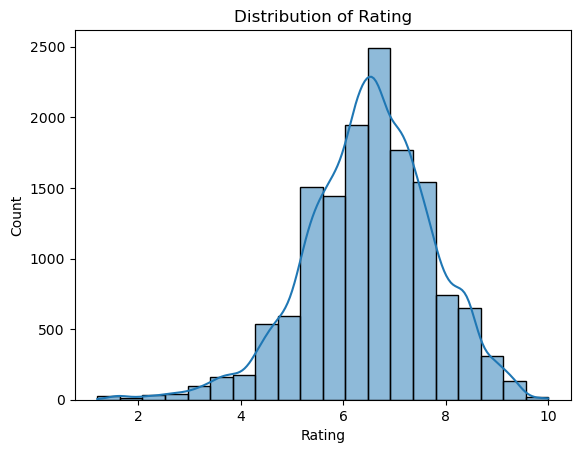

In [77]:
sns.histplot(df['Rating'],bins=20,kde=True)
plt.title('Distribution of Rating')
plt.show()

Text(0.5, 1.0, 'Distribution of Rating (Percentage)')

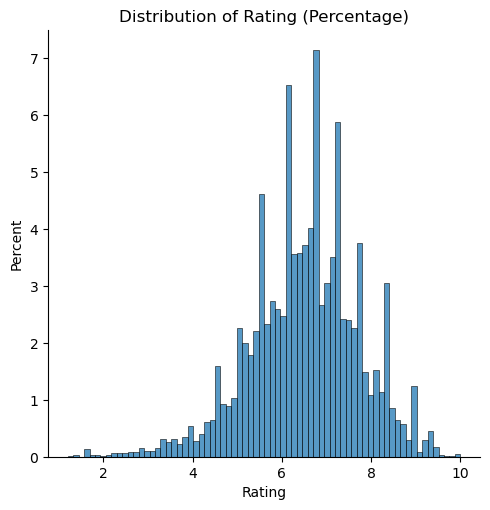

In [79]:
# percentage of ratings
sns.displot(df['Rating'],stat='percent')
plt.title("Distribution of Rating (Percentage)")

The histogram shows that the 'Rating' data is slightly skewed to the left. Meaning majority of the data is on the lower side. As well as meaning that the mean will be lower than the median. However data may be innacurate in its representation considering that 22% of the data is missing.

In [52]:
largest_rating_row = df['Number of Ratings'].idxmax()
max_val = df.loc[largest_rating_row, 'Number of Ratings']

print(f'The largest value in the column "Number of Ratings" was {max_val}, found in row index {largest_rating_row}')

The largest value in the column "Number of Ratings" was 2829797.0, found in row index 5871


In [56]:
df.loc[5871]

Title                                           The Shawshank Redemption
Available Globally?                                                   No
Release Date                                                         NaN
Hours Viewed                                                     2100000
Number of Ratings                                              2829797.0
Rating                                                               9.3
Genre                                                          ['Drama']
Key Words              prison,based on the works of stephen king,esca...
Description                                                          NaN
Name: 5871, dtype: object

In [53]:
df.loc[df['Available Globally?'] == 'Yes'].sort_values('Rating',ascending=False).head(5)
# checking to see global highly rated show with no limits placed


,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
11793,Haroun,Yes,2021-10-27,300000,7.0,10.0,"['Short', 'History']",commercial microsoft excel course,Join Chris Haroun in this Super Bowl-inspired ...
10524,Tom Papa: You're Doing Great!,Yes,2020-02-04,500000,5.0,10.0,"['Short', 'Comedy']",NaN,"On the impending death of her parents, a hopef..."
629,Love Is Blind: Brazil: Season 3 // Casamento à...,Yes,2023-06-07,30100000,9.0,9.9,"['Short', 'Romance']",NaN,The Blind 3 is following with two parts of the...
2415,One Day at a Time: Season 1,Yes,2017-01-06,8300000,30.0,9.7,"['Documentary', 'Drama']","reenactment,woman,young",One Second at a Time is a documentary about ad...
12945,Demetri Martin: Live (At the Time),Yes,2015-08-14,200000,13.0,9.7,['Music'],NaN,Former Jethro Tull guitarist Martin Barre lead...


In [73]:
df.loc[(df['Available Globally?'] == 'No')].sort_values('Rating', ascending= False).head(5)
# checking to see non-global highly rated show with no limits placed

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
4161,Big Time Rush: Season 2,No,NaN,3900000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
4907,Big Time Rush: Season 1,No,NaN,2900000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
6906,Big Time Rush: Season 4,No,NaN,1400000,10.0,10.0,"['Short', 'Comedy']",NaN,NaN
12339,The Country Cowboy // Il ragazzo di campagna,No,NaN,300000,8.0,9.9,"['Documentary', 'Short']",NaN,This is a documentary about Pete Boddis a 78 y...
14472,Zip & Zap and the Marble Gang // Zipi y Zape y...,No,NaN,200000,27.0,9.9,"['Short', 'Horror']",NaN,"On her 16th birthday, singer-songwriter Melody..."


In [76]:
highest_rating_row = df['Rating'].idxmax()
max_val = df.loc[highest_rating_row, 'Number of Ratings']
show_title = df.loc[highest_rating_row,'Title']

print(f'The largest value in the column "Rating" was {max_val}, found in row index {highest_rating_row} and the Title is {show_title}')

The largest value in the column "Rating" was 10.0, found in row index 4161 and the Title is Big Time Rush: Season 2


In [72]:
df.loc[(df['Number of Ratings'] >= 500)].sort_values('Rating', ascending=False).head(5)
# Checking to see what shows was highly-rated with limit placed for both global and non-global rating

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
16573,Mr. Boss // 미스터 보스,No,NaN,100000,530.0,9.4,"['Short', 'Adventure']",NaN,Mr. swag boss&apos;s world gets turned upside ...
425,Avatar: The Last Airbender: Book 3,No,NaN,40100000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
343,Avatar: The Last Airbender: Book 1,No,NaN,45500000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
444,Avatar: The Last Airbender: Book 2,No,NaN,38700000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
5871,The Shawshank Redemption,No,NaN,2100000,2829797.0,9.3,['Drama'],"prison,based on the works of stephen king,esca...",NaN


In [67]:
df_filtered = df.loc[(df['Available Globally?'] == 'Yes')].sort_values('Rating',ascending=False)
df_filtered.loc[(df_filtered['Number of Ratings'] >= 500)].sort_values('Rating',ascending=False).head(5)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
12920,Dating Around: Brazil: Season 1 // O Crush Per...,Yes,2020-07-10,200000,14592.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
7263,Rhyme Time Town: Season 1,Yes,2020-06-19,1300000,14593.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
16122,Kissing Game: Season 1 // Boca a Boca: Tempora...,Yes,2020-07-17,100000,14592.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
102,All of Us Are Dead: Season 1 // 지금 우리 학교는: 시즌 1,Yes,2022-01-28,94600000,14591.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."
1764,The Letter for the King: Season 1,Yes,2020-03-20,11900000,14592.0,9.2,"['Drama', 'Horror', 'Sci-Fi']","interactive drama,playstation 3,xbox 360,micro...","In a world devastated by the undead, a convict..."


In [70]:
df_filtered_nonGlobal = df.loc[(df['Available Globally?'] == 'No')].sort_values('Rating',ascending=False)
df_filtered_nonGlobal.loc[(df_filtered_nonGlobal['Number of Ratings'] >= 500)].head(5)

,Title,Available Globally?,Release Date,Hours Viewed,Number of Ratings,Rating,Genre,Key Words,Description
16573,Mr. Boss // 미스터 보스,No,NaN,100000,530.0,9.4,"['Short', 'Adventure']",NaN,Mr. swag boss&apos;s world gets turned upside ...
343,Avatar: The Last Airbender: Book 1,No,NaN,45500000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
444,Avatar: The Last Airbender: Book 2,No,NaN,38700000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
425,Avatar: The Last Airbender: Book 3,No,NaN,40100000,349385.0,9.3,"['Animation', 'Action', 'Adventure']","fire,water,action girl,coming of age,spirit","In a war-torn world of elemental magic, a youn..."
5871,The Shawshank Redemption,No,NaN,2100000,2829797.0,9.3,['Drama'],"prison,based on the works of stephen king,esca...",NaN


Findings:

If no changes are made, "Haroun" is the most highly rated global show on Netflix with a 10.0 rating and is a Netflix Original.

Among Non-global shows, "Big Time Rush" is the most well rated. 

If limits are made such as needing to have more than 500 reviews on a show, then "Mr.Boss" is the most well rated in Non-global shows and "Dating Around: Brazil: Season 1" is the most well rated world wide.

Choosing 500 as the minimum requirement for total number of reviews was based on personal preference on the idea of 500 reviews being enough to express a show's popularity and allow for variability in the show's final rating.

=================================================================

**Most Popular and Well-Rated Genres**

In [87]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Total Count']

grouped_data = pd.merge(df.groupby('Genre').agg({
    'Rating': 'mean',
    'Number of Ratings': 'sum',
    'Hours Viewed': 'sum',
}).reset_index(), genre_counts, on='Genre')  # Resetting index to have 'Genre' as a column, not an index

In [91]:
grouped_data.sort_values(by='Hours Viewed', ascending=False).head(5)

,Genre,Rating,Number of Ratings,Hours Viewed,Total Count
669,['Short'],8.444186,2644212.0,6951600000,639
429,"['Documentary', 'Short']",8.048276,432128.0,3560900000,357
147,"['Animation', 'Action', 'Adventure']",7.048317,12832270.0,2980600000,433
260,"['Comedy', 'Drama', 'Romance']",6.405459,20249742.0,2616900000,404
160,"['Animation', 'Adventure', 'Comedy']",6.368546,18150841.0,2454500000,341


Considering how specific each Genre was in the dataset, There are combined genres for some rows that proved to be difficult to separate. Judging from the data presently shown, Short were the most watched genre totaling at 6951600000.

In [98]:
grouped_data.sort_values(by="Rating", ascending=False).head(5)

,Genre,Rating,Number of Ratings,Hours Viewed,Total Count
425,"['Documentary', 'Short', 'Music']",9.4,7.0,500000,1
510,"['Family', 'History', 'Sport']",8.8,216.0,346100000,8
97,"['Adventure', 'Comedy', 'Game-Show']",8.8,13.0,100000,1
177,"['Animation', 'Comedy', 'Sci-Fi']",8.7,49.0,164000000,8
659,"['Short', 'News']",8.6,20.0,65800000,7


If going based off of highest rated genre, they can prove to be untrustworthy considering the varied number of Ratings. It can be well seen how skewed ratings can be based on the total number of titles attched to a genre, total hours, and the number of ratings.

**Netflix Original Shows vs Regular Shows**

**Shows With Highest/Lowest Viewing Hours**